In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [2]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [3]:
data = pd.read_excel('./data.xlsx')

In [4]:
data

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
...,...,...,...
983,2017-06-15,57.0303,63.9481
984,2017-06-16,57.4437,64.2795
985,2017-06-17,57.7408,64.4561
986,2017-06-20,57.9585,64.8614


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [5]:
print data.Date.dtype

datetime64[ns]


## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [6]:
print data.Date.min()
print data.Date.max()
print data.Date.max() - data.Date.min()
print len(data)

2013-06-22 00:00:00
2017-06-21 00:00:00
1460 days 00:00:00
988


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

In [7]:
data.set_index('Date', inplace=True)

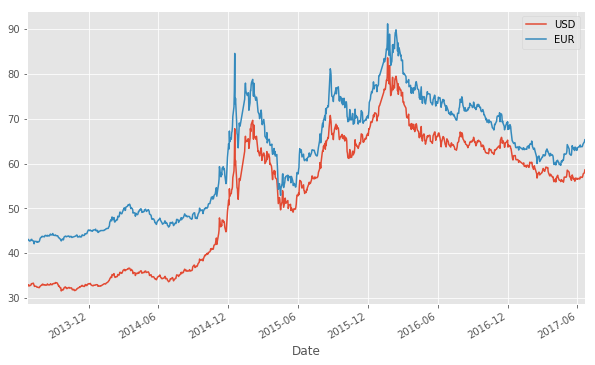

In [8]:
data.plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [9]:
data.loc['2017-05', 'EUR'].mean()

62.955273684210532

In [10]:
data.reset_index(inplace=True)

In [11]:
data.loc[data.Date.between('2017-05-01', '2017-05-31'), 'EUR'].mean()

62.955273684210532

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [12]:
(data.USD.diff() > 0.0).mean()

0.52631578947368418

In [13]:
(data.USD.pct_change() > 0.0).mean()

0.52631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

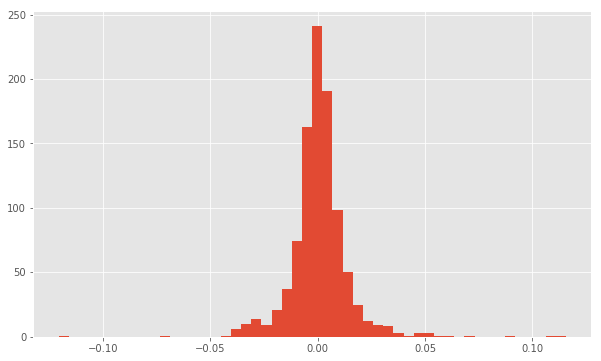

In [14]:
data.USD.pct_change().hist(bins=50)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [15]:
data['Weekday'] = data.Date.dt.weekday.replace(
    {0 : u'понедельник', 1 : u'вторник', 2 : u'среда', 3 : u'четверг',
     4 : u'пятница', 5 : u'суббота', 6 : u'воскресенье'})

## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [16]:
data.corr().loc['USD', 'EUR']

0.98230892515582702

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

In [17]:
data.set_index('Date', inplace=True)

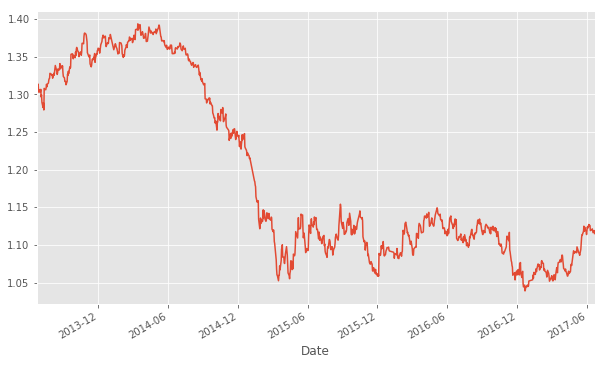

In [18]:
(data.EUR / data.USD).plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [19]:
oil = pd.read_excel('./data.xlsx', sheetname='oil')

## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [20]:
df = pd.merge(data, oil, how='inner', left_index=True, right_on='dt').set_index('dt')

In [21]:
df

,USD,EUR,Weekday,Brent
dt,,,,
2013-06-25,32.9097,43.1018,вторник,101.51
2013-06-26,32.7140,42.9698,среда,100.62
2013-06-27,32.8876,42.9841,четверг,102.74
2013-06-28,32.8766,42.8349,пятница,102.49
2013-07-02,32.8517,42.8025,вторник,103.96
...,...,...,...,...
2017-06-02,56.5373,63.5310,пятница,48.46
2017-06-06,56.6152,63.8110,вторник,48.11
2017-06-07,56.6747,63.7817,среда,47.08


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

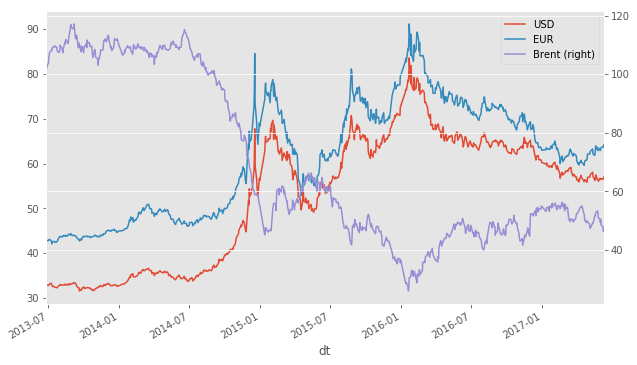

In [22]:
df.plot(secondary_y='Brent')

In [23]:
df.corr()

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [24]:
df.EUR.pct_change().groupby(df.Weekday).mean()

Weekday
вторник    0.003293
пятница   -0.001674
среда      0.000838
четверг    0.000212
Name: EUR, dtype: float64

In [25]:
df.EUR.pct_change().groupby(df.Weekday).agg(['mean', 'sem'])

,mean,sem
Weekday,,
вторник,0.003293,0.001536
пятница,-0.001674,0.001242
среда,0.000838,0.000908
четверг,0.000212,0.001008


## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.

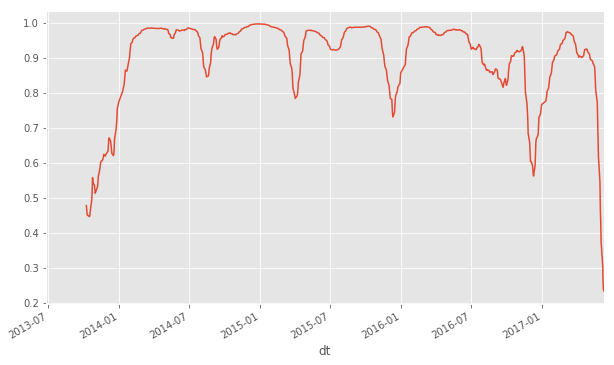

In [26]:
df.USD.rolling(60).corr(df.EUR).plot()